In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

corr_matrix = df.corr()

diabetes_corr = corr_matrix['Diabetes_binary']
diabetes_corr_list = diabetes_corr.tolist()
#print(diabetes_corr_list)

copy = df.copy()

for column in copy.columns:
    over_threshold = 0
    corr = df[[column, 'Diabetes_binary']].corr().abs().iloc[0, 1]
    x = 1000
    for _ in range(x):
        np.random.shuffle(copy[column].values)
        correlation = copy[[column, 'Diabetes_binary']].corr().abs().iloc[0, 1]
        print(f'Korrelatsioon veeru {column} ja Diabetes_binary vahel: {correlation}')
        if correlation > corr:
            print("leitud")
            over_threshold += 1
    if (x * 0.05) < over_threshold: # veerud, mida droppida tahame
        print(column)
            
        

Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsi

Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsi

Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsi

Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsi

Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsi

Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsi

Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsi

Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru Diabetes_binary ja Diabetes_binary vahel: 1.0
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.00165429888132663
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.00861376314070

Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0017683884593490643
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.00285223945056303
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0029663290285855165
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0027951946615517725
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0014261197252814727
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.004848807065957122
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0013120301472590162
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0024529259274842035
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.004050180019799547
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.005191075800024681
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0018254332483603126
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0055903893231035885
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0007986270461576721
Korrelatsioon veeru HighBP ja 

Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0011979405692365242
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.008214449617621565
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0023958811384729747
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.00011408957802251582
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0015972540923152615
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.004335403964855807
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.003764956074743256
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.001996567615394103
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0009697614131914326
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0010268062022027085
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.001197940569236464
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.007815136094542674
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.005076986222002259
Korrelatsioon veeru HighBP ja D

Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 5.704478901125718e-05
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0010268062022027373
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0026811050835292218
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.001825433248360334
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0006845374681352198
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0007415822571463721
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.009583524553891843
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.00907012145279053
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 2.5364641497171838e-18
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.005134031011013482
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.003936090441777031
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.002110657193416629
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0018824780373715587
Korrelatsioon veeru HighBP ja D

Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.003822000863754498
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.002567015505506684
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0015972540923152752
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.005134031011013425
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0029092842395742513
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.009469434975869249
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.006560150736294919
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0011408957802251862
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.00199656761539416
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.004050180019799469
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0034797321296869146
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.004050180019799469
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.00034226873406751354
Korrelatsioon veeru HighBP ja Dia

Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0024529259274841445
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0006274926791239031
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0009127166241801174
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0006274926791238684
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0013120301472589525
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0011408957802252133
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.005818568479148506
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.001654298881326541
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.004791762276945844
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.005818568479148525
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0031945081846305964
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.00530516537804724
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.000342268734067624
Korrelatsioon veeru HighBP ja Di

Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.001996567615394017
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0027951946615517266
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.004620627909912075
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0012549853582476947
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0002852239450562754
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0071305986264076845
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0025670155055066623
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0021677019824279105
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0015972540923152312
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.006217882002227355
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.001939522826382834
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0018254332483603334
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0003993135230788313
Korrelatsioon veeru HighBP ja

Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.002966329028585522
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0007986270461576405
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0003422687340676037
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.004164269597821957
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.00034226873406760337
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.00410722480881067
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.003365642551664387
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.007073553837396258
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.007815136094542683
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.002624060294517987
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 5.7044789011244196e-05
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.001882478037371599
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0017683884593490075
Korrelatsioon veeru HighBP ja Di

Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.00484880706595704
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0019965676153941357
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.00228179156045038
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0011408957802252508
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.001312030147259026
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0007986270461576282
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.003707911285731991
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.003479732129686944
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.004392448753867087
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.001254985358247774
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.00034226873406759535
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.0011979405692364629
Korrelatsioon veeru HighBP ja Diabetes_binary vahel: 0.002966329028585619
Korrelatsioon veeru HighBP ja Diab

Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.00212469003150641
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0032011996474696704
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0020680316306661934
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.005920802887797843
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0038811004575516656
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.001954714828985943
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.005977461288638061
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0008782052130226068
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0015581060231046806
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0008782052130226482
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0018980564281456936
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.006147436491158579
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.003654466854191036
Korrel

Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0007648884113422975
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.000991522014702995
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0012181556180637528
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.004107734060912361
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.005297560478556018
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0033711748499901566
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.005014268474355209
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.006544045297039754
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.002011373229825996
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0018980564281457053
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.007393921309642344
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.001614764423944878
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0005382548079815954
Korrela

Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0042777092634329284
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.002351323634867065
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0035978084533509185
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.005524194081916681
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.002407982035707293
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0020680316306662594
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.003994417259231964
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.005014268474355154
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0037677836558712703
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0015581060231047064
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0004249380063012947
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0031445412466295283
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0004249380063012719
Korr

Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0005382548079816605
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.005070926875195232
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0030312244449491187
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0037111252550312084
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.00376778365587138
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.003201199647469626
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.002351323634867068
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0014447892214242914
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0007082300105021188
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0008215468121824628
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0017847396264654388
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0037677836558713275
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.002917907643268803
Korre

Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0017847396264654156
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0004249380063013435
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.004504342866793592
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0007082300105021324
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0007648884113422653
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.00019830440294063862
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.001784739626465302
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0007082300105021336
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0029179076432687867
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.000821546812182504
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0029745660441089774
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0007648884113423384
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.002181348432346622
Ko

Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.002691274039908073
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0008215468121824358
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.00422105086259269
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0006515716096619595
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.005127585276035416
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0031445412466294675
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0016714228247850418
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0005949132088218217
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.003144541246629505
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0004249380063012748
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.006204094891998884
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0064307284953593535
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0013881308205841757
Korre

Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0018413980273055408
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.002124690031506422
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0022946652340269545
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0003116212046209706
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.002861249242428671
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0013881308205842342
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.001728081225625125
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.006714020499560215
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.004277709263432895
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0022380068331867143
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0037677836558713
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.001331472419744036
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.001444789221424395
Korrelats

Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.003427833250830248
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0015014476222645519
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.004561001267633719
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0022380068331867603
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0038244420567115907
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.005410877280236227
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0005949132088218484
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0024079820357072387
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0021246900315064054
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 2.83292004200882e-05
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0006515716096619621
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.009263648537367934
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0025212988373876184
Korr

Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0016714228247850665
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0012748140189038748
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.003087882845789293
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.00450434286679347
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0012748140189038242
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.008470430925605557
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.004674318069314047
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0055241940819167
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0015581060231046973
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.0034844916516705046
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.00042493800630128813
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.006430728495359443
Korrelatsioon veeru HighChol ja Diabetes_binary vahel: 0.002238006833186737
Korrelat

Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0037337382014301515
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.008287077471466703
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.002276669635018394
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0006374674978050813
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0008196010686065256
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.004826539626238866
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 9.10667854007243e-05
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0035516046306287713
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0026409367766212707
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.002640936776621311
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0037337382014300566
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0037337382014301338
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.00318733748

Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.004826539626238862
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0033694710598270554
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.00573720748024612
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.004644406055437416
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 9.106678540077995e-05
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0030052039182242086
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.005555073909444766
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0008196010686065942
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0015481353518123947
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0015481353518123947
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.002094536064216965
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 9.106678540066302e-05
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.003551604630

Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0039158717722316
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.00373373820143006
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 9.106678540072593e-05
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0004553339270035786
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.005737207480246279
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0022766696350182787
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 9.1066785400748e-05
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0026409367766212673
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.007922810329863833
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.003915871772231498
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0020945360642168533
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.003187337489025742
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.00136600178101103

Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.001730268922613917
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0010017346394080823
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.00464440605543738
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0013660017810110145
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.004462272484636103
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0015481353518124559
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0033694710598272033
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0008196010686065623
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.003369471059827251
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0033694710598272033
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 9.106678540065726e-05
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.001730268922613902
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.002458803205

Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.001183868210209463
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0044622724846359665
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0010017346394081072
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.00464440605543738
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0011838682102095195
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0008196010686066199
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.002458803205819837
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.003551604630628611
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.004462272484635901
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0015481353518124678
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0031873374890255494
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0062836081926505565
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.002094536064

Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0024588032058196927
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0024588032058197175
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.002458803205819741
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0013660017810110503
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.00755854318826097
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0008196010686065606
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.001001734639408044
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0022766696350183637
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.008104943900665308
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0006374674978050986
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0028230703474227533
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0011838682102095158
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.00591934105

Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0028230703474226857
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.006647875334253681
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 9.106678540072734e-05
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.003005203918224096
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.002458803205819752
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0017302689226139885
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0008196010686065945
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.006465741763452182
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 9.106678540072908e-05
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.003187337489025628
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.004644406055437522
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.002094536064216834
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0048265396262

Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0002732003562022105
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 9.106678540070304e-05
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0020945360642167926
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0020945360642169153
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.008651344613069732
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.00118386821020968
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0019124024934154015
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0006374674978051373
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0011838682102094193
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.004098005343033008
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.00027320035620212945
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0006374674978051228
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.004826539

Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.003369471059827178
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.0028230703474227724
Korrelatsioon veeru CholCheck ja Diabetes_binary vahel: 0.009379878896275486
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.00499904484552425
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0008431165531035205
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.005225731843292854
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.004338868676584683
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.004999044845524257
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.002103814417885685
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0016226016682370514
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0011732046375733068
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.007938021886767285
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.004140020432928196
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0039

Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.002322547485907913
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.002529349659310672
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.006597784724522528
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.007130698017521979
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.003300880844697848
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0008789092369617335
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.004784288742375302
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.004824058391106546
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0021594919261095974
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.002879322568145998
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.003010562408959346
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.003595176245309396
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.00045337399553681414
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0027242209380940736
K

Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0019924594014380783
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0015231775464087866
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.005138238616083731
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0016265786331100718
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.00039371952243984193
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.004517832095875601
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.005635359225225053
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0024975339403255858
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.002370271064385407
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0034559824747499245
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.000922655850566142
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0033088347744441226
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0003022493303578123
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0055399120682700

Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0024140176779898536
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0022708469425571157
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.005822276574262232
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0026446816406314223
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0017299797198115886
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0023344783805272296
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0007198306420365089
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 4.7723578477521944e-05
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0029588618656086444
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0038854946810479166
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.005257547562277827
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.00241004071311671
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0023901558887510946
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.001248766970162

Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0003141802249772056
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.00478826570724849
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.003674715542772134
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.000874932272088545
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0010538956913794424
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.006657439197619531
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.001733956684684563
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0018731504552442564
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.004287168133234013
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.004561578709479975
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0005090515037605726
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0038974255756673943
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.005448441876188037
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.004939390372427357
Ko

Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.003714485191503384
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.007560210223819855
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0015629471951400715
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0037582318051077295
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0035037060532275206
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0026208198513926603
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.004772357847755793
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0022668699776840114
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.011461612764360519
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.00019884824365643789
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0018015650875278296
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.002585027167534399
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0032133876174889916
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0002744105762458

Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.006721070635589414
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.003718462156376422
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.005627405295478765
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.004867805004711062
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0021475610314902064
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.00386163289180912
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0027838754111909263
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.004199674906025093
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0013919377055954163
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0035235908775930183
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0005885908012232153
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0037820935943466
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0009504946046781539
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0006164295553350474
Ko

Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0027083130786014916
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0023185705210347486
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.001256720899909081
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.003937195224398619
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0006164295553352235
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.002541280553930082
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0010499187265063537
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.005317202035374603
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0035355217722125207
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.003992872732622486
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.00474054212877087
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0028156911301759173
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.00845105035540118
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0017697493685427555
K

Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0007556233258945875
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.005436510981568653
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.00427921420348767
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.002350386240019699
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0038337941376971304
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.000600521695842692
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0018811043849904954
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.002000413331184326
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.005066653248367466
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.008192547638647638
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.007679519170013794
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.000684037958178316
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0015152236166624245
Korrelatsioon veeru BMI ja Diabetes_binary vahel: 0.0018970122444829747
Ko

Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.005778586527810372
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0036257797821555556
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.006571725855156852
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.008044698891657575
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0041923078731172765
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0022661123638472026
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.005212058436848461
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.004135655064021147
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0018128898910776947
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0010197505637312165
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.001812889891077735
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.001699584272885454
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0016995842728853444
Korrelatsioon veeru Smoker ja Di

Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0020395011274624885
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0003399168545771006
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0048721415822715495
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0019261955092701173
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.004135655064021087
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.002492723600231904
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0019828483183663196
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0037390854003478925
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.005212058436848513
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.002209459554750981
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0015862786546930587
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0023227651729434136
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0028892932639051757
Korrelatsioon veeru Smoker ja

Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0020961539365586643
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.002379417982039536
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0006231809000579698
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0003399168545770902
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0018695427001739597
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.005042100009560013
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0015296258455968412
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0025493764093281034
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0019261955092701125
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0028326404548089487
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.005778586527810316
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.001303014609212103
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.003852391018540256
Korrelatsioon veeru Smoker ja 

Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.006854989900637799
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.004985447200463734
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0023794179820395395
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.003965696636732656
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0020395011274624707
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0001699584272885282
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.002096153936558681
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0017562370819815456
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0015862786546930207
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0027193348366165242
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.004418919109502021
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0007931393273465595
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.000566528090961785
Korrelatsioon veeru Smoker ja D

Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.00158627865469303
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.001699584272885366
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0017562370819815586
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0040223494458287564
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.002096153936558695
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.00747817080069584
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.006458420236964409
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0004532224727694372
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0027193348366166244
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0048721415822714905
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.004305613491309635
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.004758835964079088
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.004532224727694352
Korrelatsioon veeru Smoker ja Diabe

Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0010197505637312642
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.004815488773175347
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0011330561819235814
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.004022349445828677
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0015862786546930545
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0039090438276364005
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0010197505637312438
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.002889293263905178
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0037957382094440427
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 3.3110686446465386e-17
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.002209459554751009
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0014163202274044457
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.005438669673233249
Korrelatsioon veeru Smoker ja

Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.004588877536790517
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0035124741639631606
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0016995842728854032
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 2.953026031555383e-18
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0012463618001160004
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 1.1604543191096244e-18
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0030025988820975304
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0025493764093280995
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.00016995842728852816
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.005325364055040869
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.005155405627752348
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0018695427001739063
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.004192307873117305
Korrelatsioon veeru Smoker 

Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0019828483183662315
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0002266112363847147
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.000623180900057979
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0054386696732332575
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.00113305618192355
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.0002266112363847078
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.003285862927578428
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.004928794391367673
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.004872141582271424
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.003795738209443996
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.001189708991019797
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.00379573820944403
Korrelatsioon veeru Smoker ja Diabetes_binary vahel: 0.00016995842728857003
Korrelatsioon veeru Smoker ja Diab

Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0027534137693615685
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.002519080682607284
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0045109119200177
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.003807912659755212
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.00849457439483842
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.000995915618705189
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0027534137693615342
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0035735795730010246
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0022847475958531057
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.004393745376640605
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.01435290156369262
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.007440075504444772
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.001464581792213538
Korrelatsioon veeru Stroke ja Diabetes

Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.004510911920017714
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0024019141392302105
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0015817483355906935
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.008025908221330263
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0065027431574282086
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0007615825319510416
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0022847475958530854
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.008143074764707341
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.00638557661405104
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.00017574981506561624
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.006385576614051092
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.000761582531951053
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.003690746116378115
Korrelatsioon veeru Stroke ja Di

Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.003339246486246848
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0035735795730009556
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0007615825319510791
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.006619909700805156
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.000292916358442723
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0011130821620822411
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.004042245746509337
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0008787490753281544
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.002987746856115613
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.002519080682607315
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0035735795730010562
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.002167581052476056
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.003807912659755161
Korrelatsioon veeru Stroke ja Dia

Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.002519080682607309
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.006151243527296908
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.005799743897165552
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.002050414509098986
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0009959156187052648
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0015817483355906054
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0015817483355906193
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0027534137693614198
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.00029291635844274776
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0029877468561157004
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.003339246486246821
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0025190806826072987
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.00029291635844269095
Korrelatsioon veeru Stroke j

Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.007557242047821905
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.00814307476470726
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0013474152488364124
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.003339246486246848
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.006268410070673932
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.002753413769361469
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 5.8583271688526384e-05
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.002636247225984386
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0018160814223447965
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.001933247965721825
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.004276578833263507
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0016989148789677596
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0002929163584427344
Korrelatsioon veeru Stroke ja Dia

Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.000527249445196928
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.003925079203132298
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.002753413769361434
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0006444159885739915
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.001581748335590597
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0009959156187052016
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0016989148789677176
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.002987746856115675
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0028705803127385
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.005799743897165637
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0009959156187052314
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0034564130296239753
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.003690746116378159
Korrelatsioon veeru Stroke ja Diabe

Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.002167581052476067
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0018160814223447275
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0021675810524760314
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.004745245006771855
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0012302487054593793
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0011130821620822758
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.004159412289886567
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.001113082162082308
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.003573579573001077
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0016989148789676898
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0015817483355906605
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0008787490753281475
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.006268410070673995
Korrelatsioon veeru Stroke ja D

Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0006444159885739452
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0032220799428698344
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0006444159885739252
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0035735795730010606
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0026362472259843393
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0004100829018198
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0016989148789677054
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0007615825319510877
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0015817483355905738
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0018160814223447523
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 5.858327168852094e-05
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0015817483355906059
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.001698914878967712
Korrelatsioon veeru Stroke ja

Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0027534137693614185
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.00029291635844273556
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0004100829018198166
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0008787490753280996
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.010603572175626068
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.00486241155014893
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.00029291635844271713
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.003104913399492703
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.002050414509098969
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.007088575874313479
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.005448244267034378
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.0031049133994927075
Korrelatsioon veeru Stroke ja Diabetes_binary vahel: 0.005916910440542792
Korrelatsioon veeru Stroke ja D

Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.002192158891994022
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0021124440231942046
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0002790020407992254
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0009167209911975109
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.003786456267989756
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0005181466471986231
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0055401833815849205
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.007612769970379351
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.00099643585999726
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0025907332359930055
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0013950102039962282
Korrelatsioon veeru HeartD

Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.005221323906385876
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0021921588919940806
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0017138696791953259
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0009167209911975165
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0035473116615903507
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.001873299416794972
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0073736253639800405
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.008888207871175984
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0034675967927906164
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0009964358599973194
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.005938757725583899
Korrelatsioon veeru Heart

Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0017138696791953781
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.003228452186391314
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.006018472594383753
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0002790020407992702
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.003945886005589315
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0013950102039962658
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.002112444023194298
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0016341548103955645
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.004185030611988696
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0005181466471986649
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.004663319824787392
Korrelatsioon veeru HeartDi

Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.005061894168786436
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0017935845479951876
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0030690224487917024
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0031487373175914358
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.006417046938382674
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.006337332069582841
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0008370061223977577
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.004424175218388014
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0056996131191845946
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.005301038775185722
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.002750162973592549
Korrelatsioon veeru HeartDi

Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0038661711367894477
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0036270265303901994
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.003786456267989836
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0026704481047927276
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0028298778423923414
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.00019928717199950007
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0011558655975968204
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0036270265303901747
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.006337332069582916
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.000677576384798232
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0021921588919940997
Korrelatsioon veeru Hea

Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0009167209911975475
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0013152953351965053
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.002192158891994028
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.002351588629593684
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0029893075799919144
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.004424175218388097
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0018732994167949225
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.001076150728797014
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0030690224487916868
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.004025600874389129
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.002989307579991881
Korrelatsioon veeru HeartDi

Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0024313034983934187
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.004105315743188922
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0012355804663966785
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0045038900871878125
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0017935845479950957
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.001076150728797068
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0030690224487916807
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0014747250727960108
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.002351588629593556
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0049024644311867595
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0005181466471985864
Korrelatsioon veeru Hear

Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 3.985743439996361e-05
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.005540183381585087
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0003587169095989701
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.004105315743188881
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0001992871719995186
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0010761507287970872
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.002192158891994095
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.004185030611988688
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0004384317783988323
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.003866171136789522
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.008569348395976827
Korrelatsioon veeru HeartDi

Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.005938757725583942
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0002790020407992457
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0027501629735925924
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0021124440231942826
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 3.9857434399877074e-05
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.004264745480788493
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.0016341548103955947
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.002590733235993085
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.001315295335196465
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.004822749562387041
Korrelatsioon veeru HeartDiseaseorAttack ja Diabetes_binary vahel: 0.00043843177839884297
Korrelatsioon veeru Hear

Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0011454882692623926
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0038698928015621402
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.003374546522962261
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.00752307160623704
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.006780052188336953
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.003684137947087169
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0007739785603124141
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0007120602754874779
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.006037032770436936
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0007120602754874396
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0008358968451374068
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.003188791668487297
Korrelatsioon veeru PhysActivity ja

Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.004427157364987149
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0007739785603123814
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0027553636747122893
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.006222787624912027
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.002941118529187273
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0008978151299623774
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.007275398466936935
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0006501419906624874
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0009597334147874017
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0005882237058374718
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.003188791668487268
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.000588223705837458
Korrelatsioon veeru PhysActivity j

Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.004489075649812074
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0005882237058374276
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0026934453898873043
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0004024688513624959
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0015169979782124019
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.004984421928412051
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.003498383092612162
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.003869892801562067
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.005975114485611942
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0007120602754873688
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0015169979782123156
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.003188791668487255
Korrelatsioon veeru PhysActivity j

Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.002321935680937274
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.00015479571206242478
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0031887916684872415
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.00907102872686172
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0012074065540873796
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0026934453898872753
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0013931614085623887
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.002879200244362281
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0007739785603123976
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0008358968451374812
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0013312431237373912
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0008358968451374178
Korrelatsioon veeru PhysActivit

Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.00015479571206254613
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0017646711175123425
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.003684137947087214
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0059751144856120325
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.002321935680937313
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.004055647656037241
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0059751144856120516
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0017646711175123026
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0034983830926121873
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.005046340213237029
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0073992350365869155
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.006284705909736947
Korrelatsioon veeru PhysActivity

Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.00424140251051216
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.003746056231912164
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0028792002443621843
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.005851277915962027
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0007739785603124108
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.005355931637362101
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0008358968451374404
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0008358968451374232
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0002786322817124695
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.002074262541637339
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0018265894023373186
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.005665523061487043
Korrelatsioon veeru PhysActivity ja

Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0019504259719872372
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0008358968451374244
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.005541686491837059
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0007120602754874383
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0021980991112872917
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.005417849922187034
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0020123442568123215
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0015169979782123587
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.006594297333861856
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0015169979782123915
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.003374546522962187
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.00027863228171244977
Korrelatsioon veeru PhysActivit

Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0005263054210123986
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0005263054210124695
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.003931811086387193
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0007739785603124722
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.00399372937121213
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0040556476560372244
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.010185557853711537
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0028172819595371494
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.002693445389887295
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.002941118529187252
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.003064955098837266
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0010835699844374464
Korrelatsioon veeru PhysActivity ja

Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 3.095914241245927e-05
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0028792002443621782
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.004736748789112076
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0011454882692624407
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0009597334147874904
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0007739785603124502
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.005851277915961904
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0029411185291872404
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0036841379470872134
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.006965807042811955
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0007739785603123775
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.005851277915961993
Korrelatsioon veeru PhysActivity

Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 3.095914241249914e-05
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.002012344256812305
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0021980991112872596
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0005882237058374607
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.002693445389887258
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.005355931637361975
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.00343646480778725
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.00424140251051217
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0009597334147874443
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0007120602754874688
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.0008358968451374594
Korrelatsioon veeru PhysActivity ja Diabetes_binary vahel: 0.002569608820237298
Korrelatsioon veeru PhysActivity ja 

Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.003628325032653717
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.00281558022533921
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0022931014206371433
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0037444314336985514
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.008620900277585206
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.006937357462433964
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.004034697436310911
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0026994738242943493
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0019447822175023839
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.002235048220114681
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0033380590300413964
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.000841771407575685
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.006821251061388924
Korrelatsioon veeru Fruits ja Diab

Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.004847442243625323
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0006095586054858536
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0017706226159350169
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.005253814647282572
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0013061970117553452
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.003686378233176141
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0033961122305638585
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0014223034128002853
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0004934522044408979
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0020028354180248054
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0014223034128002393
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.005602133850417309
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.005834346652507039
Korrelatsioon veeru Fruits ja 

Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0024092078216820553
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.007227623465046054
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.004150803837355925
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0006676118060082761
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.003744431433698666
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 2.902660026120212e-05
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.002060888618547293
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0031058462279515927
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.002002835418024833
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0025253142227269097
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.002060888618547325
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0060665594545970015
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.003976644235788429
Korrelatsioon veeru Fruits ja Di

Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.002699473824294339
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0025833674232494113
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.003570271832131216
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0014223034128002326
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.003512218631608756
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.005253814647282608
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0007256650065307228
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0017125694154125478
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0010159310091429953
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0024672610222045595
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0035122186316087706
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.005660187050939757
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.005892399853029585
Korrelatsioon veeru Fruits ja D

Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.002118941819069758
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.004789389043102887
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.004557176241013107
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.001306197011755379
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.012684624314157409
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0008998246080981078
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0029316866263842433
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.001015931009143059
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.002641420623771928
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0017125694154125509
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.005427974248849925
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.002583367423249415
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0007256650065307358
Korrelatsioon veeru Fruits ja Diab

Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.001306197011755345
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0046732826420579415
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0026414206237718608
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.004266910238400682
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0017125694154125736
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0005515054049633184
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.001132037410187934
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.005369921048327498
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0007837182070531994
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.003570271832131291
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0028155802253392323
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.004847442243625288
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.008737006678630083
Korrelatsioon veeru Fruits ja Di

Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0033961122305638945
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0005515054049633741
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.001422303412800239
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 2.902660026119174e-05
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0038024846342211236
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0013061970117553049
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.00043539900391846017
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.005660187050939795
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0015964630143676642
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0013061970117553402
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.004557176241013075
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.006414878657731764
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.00380248463422108
Korrelatsioon veeru Fruits ja 

Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.003105846227951456
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0018286758164574664
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0019447822175024502
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0028155802253392796
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.003163899428473941
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 2.9026600261216366e-05
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0013061970117553452
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0022350482201147106
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0007256650065307054
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0002031862018286258
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0028155802253392883
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.002989739826906617
Korrelatsioon veeru Fruits ja Diabetes_binary vahel: 0.0014803566133227482
Korrelatsioon veeru Fruits 

Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.000762434092429857
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0007624340924298537
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.00485185331546251
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0014555559946387382
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.009079896918937359
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 6.931219022087368e-05
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.003742858271928235
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0031883607501610885
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.001594180375080551
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.001108995043534314
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.005059789886125287
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0014555559946388182
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0042973557936954515
Korrelatsioon veeru 

Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.007762965304740234
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0015248681848596456
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.005891536168776093
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0010396828533133504
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0018714291359640599
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0006238097119880309
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0020793657066267945
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.001455555994638822
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.003188360750161182
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0012476194239760582
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.005475663027450613
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0032576729403820726
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.00207936570662681
Korrelatsioon veeru

Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0015248681848597325
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0059608483589968205
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.005267726456787976
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0011089950435343209
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0007624340924298775
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0006238097119880731
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0002772487608835134
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0031190485599402753
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.004297355793695425
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0036042338914864885
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0022179900870685867
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0035349217012656
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0019407413261850219
Korrelatsioon vee

Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.003396297320823761
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 6.931219022092015e-05
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0011783072337551892
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0009703706630925199
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0006931219022089087
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.003049736369719346
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.003673546081707326
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.001316931614196952
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.005822223978555084
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0009010584728715991
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0013169316141970204
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.005059789886125275
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0036735460817073472
Korrelatsioon veer

Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.00374285827192826
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.00027724876088353534
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0009703706630925431
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.00027724876088359096
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 5.048050509260503e-18
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0039507948425908665
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0014555559946387371
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.009218521299379027
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.001663492565301456
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0007624340924297336
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.002564551038173085
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0024952388479522287
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.008802648158053525
Korrelatsioon ve

Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.004713228935020807
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.000693121902208947
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.004366667983916392
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0002772487608835931
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0032576729403820505
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.010882013864680252
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0018021169457432412
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.005337038647008787
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0024952388479521186
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0018714291359640844
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0052677264567879386
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.003950794842590957
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0026338632283940846
Korrelatsioon veer

Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.002217990087068592
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.006584658070984919
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0054063508372298045
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0047132289350207725
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0027724876088357883
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.00048518533154620733
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.00027724876088362007
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.004921165505683527
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.003326985130602946
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.00034656095110450797
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0011783072337552011
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.007139155592752102
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0036042338914865205
Korrelatsioon 

Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0033962973208238054
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0035349217012656635
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.00048518533154623893
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0007624340924298108
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.004158731413253631
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0009010584728716024
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0015941803750805683
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.005683599598113299
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.002079365706626794
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0020100535164059193
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.005337038647008954
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0024259266577312485
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0006238097119880986
Korrelatsioon v

Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0013169316141969731
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0029804241794984493
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.001802116945743224
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.006584658070984849
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.0018021169457432937
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.007485716543856528
Korrelatsioon veeru Veggies ja Diabetes_binary vahel: 0.004643916744799992
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0030778305001531434
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.003917238818376752
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0030778305001532237
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.006015759613935738
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0012591124773353591
Korrelatsioon veeru HvyAlcoholConsump ja Dia

Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.004336942977488496
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.002937929113782525
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.000979309704594244
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0023783235683001547
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.00013990138637059876
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.001818718022817759
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0065753651594181685
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0015389152500764958
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0005596055454824495
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0006995069318530034
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.004057140204747326
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary v

Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.002518224954670771
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.004616745750229757
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.003637436045635521
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.004896548522970999
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0033576332728943855
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0005596055454823723
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.005456154068453373
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0013990138637059962
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.00013990138637056068
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0008394083182235813
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0025182249546707087
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary v

Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0016788166364471789
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0015389152500765787
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.001958619409188396
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.005316252682082682
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0005596055454823783
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.00279802772741196
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.007414773477641661
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0016788166364472032
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.006715266545788738
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0032177318865236775
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0036374360456356163
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vah

Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0012591124773353184
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.00503644990934149
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.006295562386676902
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.006155661000306465
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0030778305001531803
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.003217731886523795
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0008394083182235963
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.004197041591117903
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0002798027727412099
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0030778305001532215
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.004336942977488474
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahe

Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0013990138637060368
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.004896548522971064
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.007274872091271038
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0016788166364471789
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0013990138637059754
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0012591124773354153
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0006995069318529848
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0011192110909647567
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0009793097045942205
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.005176351295712145
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.005735956841194608
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary v

Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0065753651594180245
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0041970415911179925
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0029379291137825933
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.00153891525007653
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0012591124773354153
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.006715266545788774
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.002658126341041385
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0047566471366003865
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.00027980277274122366
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0018187180228177657
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.000279802772741183
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary v

Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.004896548522970987
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.001119211090964795
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.00657536515941816
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0026581263410414228
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.00013990138637063013
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0002798027727411463
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.003357633272894346
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0020985207955589685
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0027980277274119903
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0004197041591117968
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.003357633272894399
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary va

Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.00293792911378254
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.002238422181929591
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0012591124773354122
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.00559605545482393
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.007694576250382841
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.002098520795558925
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0005596055454824156
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.003217731886523778
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.002937929113782578
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0001399013863706125
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0033576332728944137
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel:

Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.003917238818376725
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0025182249546707486
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.00027980277274120886
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.003777337432006135
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.00013990138637059687
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0005596055454824004
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0013990138637060019
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0015389152500765771
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.0025182249546707816
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.003777337432006164
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary vahel: 0.006715266545788783
Korrelatsioon veeru HvyAlcoholConsump ja Diabetes_binary

Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0004092485034903567
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.003137571860092973
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00927629941244884
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0031375718600929886
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.006547976055846108
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.005865895216695602
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.004092485034903763
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.005729479048865333
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.005729479048865484
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.003819652699243631
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0009549131748108441
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0023190748531120475
Korrelatsioon veeru AnyHe

Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0010913293426411403
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0009549131748108784
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0070936407271667765
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.005729479048865435
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0010913293426409532
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.003956068867073663
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00040924850349041686
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0045017335383942545
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0005456646713204948
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0027283233566026467
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.004638149706224422
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.004638149706224377
Korrelatsioon veeru

Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00463814970622442
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00422890120273412
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00013641616783016062
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.005320230545375065
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.007912137734147475
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.006684392223676425
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.002319074853112158
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.002182658685281899
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.006275143720186027
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0010913293426410254
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0005456646713204761
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0006820808391507672
Korrelatsioon veeru AnyHe

Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0047745658740545385
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.005729479048865389
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.000272832335660302
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0038196526992437777
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0015005778461314435
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00013641616783014227
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00777572156631748
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0039560688670737375
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0005456646713204894
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.002591907188772491
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.006684392223676288
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0005456646713204265
Korrelatsioon veeru A

Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0019098263496217583
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.007093640727166666
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00313757186009299
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0017734101817917446
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0028647395244326334
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0020462425174519448
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.006684392223676513
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0013641616783012821
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.002728323356602548
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0017734101817916171
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.004638149706224304
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00750288923065711
Korrelatsioon veeru AnyH

Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0019098263496218168
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.003819652699243643
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0016369940139615172
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0039560688670738095
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.005183814377544898
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0002728323356603191
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.000818497006980836
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0021826586852820877
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.011049709594240568
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00532023054537513
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.003819652699243583
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0020462425174520085
Korrelatsioon veeru Any

Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0020462425174520016
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.002182658685282061
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00081849700698084
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0015005778461313626
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.006138727552355831
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0035468203635834546
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00504739820971481
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00040924850349043573
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0010913293426411646
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0010913293426410525
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.005047398209714794
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.002455491020942281
Korrelatsioon veeru Any

Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0013641616783013253
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0006820808391506861
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0030011556922628795
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0012277455104712667
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0030011556922628197
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.000954913174810916
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0017734101817916768
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0020462425174518845
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.00422890120273401
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0016369940139615462
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0045017335383942345
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.005047398209714842
Korrelatsioon veeru 

Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0015005778461314265
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0017734101817916943
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0013641616783012984
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0042289012027340025
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0016369940139615504
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0027283233566026263
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.006684392223676277
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.004092485034903997
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0025919071887724964
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.006002311384525668
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0021826586852821067
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.001773410181791706
Korrelatsioon veeru 

Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0017734101817916716
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.003273988027923057
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0050473982097147966
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.0036832365314134036
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.004774565874054485
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.006820808391506537
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.006684392223676397
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.002455491020942337
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.004365317370564194
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.004228901202734001
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.002046242517451901
Korrelatsioon veeru AnyHealthcare ja Diabetes_binary vahel: 0.004228901202734036
Korrelatsioon veeru AnyHe

Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.007516412847727434
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.002570128264061612
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00179424048623165
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.008098328681099951
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0019882124306891237
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.005188749514237549
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00557669340315258
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0061586092365250155
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00509176354200882
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0008243807639442746
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.002085198402917941
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0016972545140029795
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary 

Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.005770665347610044
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00014547895834309807
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.001018352708401738
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00218218437514665
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0011153386806305489
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.007322440903269877
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0013093106250879427
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.006643539097668751
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0023761563196041616
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00024246493057182954
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00024246493057180257
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.008777230486701208
Korrelatsioon veeru NoDocbcCost ja Diabetes_

Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.007807370764413552
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.004218889791950207
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0035399879863489956
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.003152044097434008
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0018912264584604586
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0037339599308065363
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0018912264584604076
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0035399879863489705
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0015032825695454758
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0015032825695454359
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0011153386806305153
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0018912264584604547
Korrelatsioon veeru NoDocbcCost ja Diabetes

Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00014547895834307844
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0023761563196041764
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0017942404862317082
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.002958072152976566
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0006304088194868033
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.004121903819721413
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0013093106250879887
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.004121903819721507
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.007419426875498582
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.005091763542008851
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00014547895834309278
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0059646372920675655
Korrelatsioon veeru NoDocbcCost ja Diabetes

Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0017942404862316763
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.005188749514237668
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0004364368750293007
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.003249030069662759
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.004509847708636366
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0015032825695455115
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0011153386806305727
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0008243807639442895
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.003249030069662723
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0002424649305718178
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 4.849298611436702e-05
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.007128468958812411
Korrelatsioon veeru NoDocbcCost ja Diabetes_b

Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0024731422918328745
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0015032825695454667
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0019882124306892074
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0017942404862317338
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0016972545140029457
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00043643687502934386
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.009553118264530983
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00014547895834309368
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.002376156319604117
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0027641002085191362
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.005285735486466373
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0001454789583431256
Korrelatsioon veeru NoDocbcCost ja Diabet

Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0050917635420087695
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.003152044097434146
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.005188749514237578
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.008195314653328572
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 4.8492986114345714e-05
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0008243807639443104
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.006837511042126237
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.002473142291832908
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0013093106250879768
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0037339599308065154
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0041219038197214545
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.004024917847492701
Korrelatsioon veeru NoDocbcCost ja Diabetes_b

Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00014547895834315228
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0061586092365251656
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0031520440974340445
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00043643687502934196
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0009213667361730387
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0009213667361730343
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0027641002085190894
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.004509847708636373
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0025701282640616064
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0045098477086363475
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.003539987986349022
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.005770665347609896
Korrelatsioon veeru NoDocbcCost ja Diabet

Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.003830945903035199
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.003636973958577751
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0032490300696627807
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.003733959930806469
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.00043643687502928493
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0055766934031525614
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.008001342708870969
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.005964637292067471
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.001891226458460423
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.004509847708636504
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0023761563196041382
Korrelatsioon veeru NoDocbcCost ja Diabetes_binary vahel: 0.0040249178474927256
Korrelatsioon veeru NoDocbcCost ja Diabetes_bi

Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0022484885758593696
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.00047002303563161205
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.009159097532173015
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.003620447706892239
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0012830358540214968
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0024771484310314993
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0043826472241327635
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0011814092517227043
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0018419821666644247
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.002223081925284773
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0037474809597656243
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0025533683827556703
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.002146861973560694
Korrelatsioon v

Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.004103174067811152
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0016133223114923165
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0022230819252847217
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.005170253391947957
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0027058082862036715
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0014608824080442084
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0036712610080416007
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0008511227942518369
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0014608824080442253
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.005144846741373192
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0037982942609150827
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.004230207320684685
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.005576759801142799
Korrelatsioon vee

Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0021214553229859374
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.003544227755168161
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0031377213459732657
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.009692637194241344
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0011051892999986445
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.00524647334367194
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0001397365781607602
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0027820282379277467
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0034680078034441415
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0017657622149404957
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.005195660042522469
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.002705808286203647
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.003366381201145493
Korrelatsioon veeru

Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.003671261008041563
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0037474809597656867
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.005297286644821284
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0010543759988493066
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.007482258594243948
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0040015474655124865
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.004585900428730057
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.007253598739071843
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0013592558057455386
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0011560026011480332
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0026041816839050187
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0029598747919504843
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.005907046258613548
Korrelatsioon veer

Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.004255613971259228
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.004662120380454262
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0027566215873531083
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0022993018770086997
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.005043220139074472
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0029344681413757782
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.001232222552872128
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0027058082862036256
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.00491618688620097
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.001206815902297349
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.006821685679302235
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0003938030839075433
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.004153987368960539
Korrelatsioon veeru G

Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0010289693482745876
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.003290161249421445
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.002172268624135302
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0015879156609177039
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.004077767417236454
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0014354757574695383
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.009946703699988235
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0023755218287328235
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0011051892999987005
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0014608824080442452
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0028074348885024423
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0038999208632137404
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0036458543574669332
Korrelatsioon ve

Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.000825716143677274
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.003163127996547977
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0014100691068948629
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.009260724134471855
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.001943608768963195
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.005500539849418707
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0031123146953986147
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0030360947436744983
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.004535087127580827
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0015879156609175803
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 1.2703325287329152e-05
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.005398913247120046
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0044334605252820194
Korrelatsioon veer

Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0017657622149403747
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0008511227942519064
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.001333849155170831
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.006948718932175604
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0031631279965480042
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0038745142126390603
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0006478695896543992
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.007075752185048962
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0005208363367809849
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.003163127996547982
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.00326475459884665
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0106072766149298
Korrelatsioon veeru GenHlth ja Diabetes_binary vahel: 0.0009273427459759728
Korrelatsioon veeru G

Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0034568677937192667
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.00340830166315025
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.006832213868269047
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0017605222331285547
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.00047698878237467906
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0016148238414212923
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004629392946029565
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.002492483200990758
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0032487272341375326
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0012297638061952046
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0016911420466012926
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0004804577917010845
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0009938711720026356
Kor

Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0029365163947650706
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.005097709205088289
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.003779485661070951
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0010771273958352851
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0007024743885882259
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0003590424652784189
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004004971267284381
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0032903553460538492
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0003070073253830236
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.001541974645567747
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004906913692138478
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.005302380755343639
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004022316313916203
Korrel

Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0009695881067181088
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0055590874454943704
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004393500311836948
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0029365163947650537
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0029885515346605167
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004934665766749325
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.005905988378130505
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.002638181592697933
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.006898125045470068
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0009106149481698916
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 6.76456818640285e-05
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.003286886336727523
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.00025497218548757117
Korre

Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0034152396818029453
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004521853656912226
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004886099636180301
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.006048217760511319
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004830595486958491
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0028948882828486785
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.010509363754212365
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0003035383160566536
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0014968775243249996
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0016599209626640516
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 5.376964455859197e-05
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0023988199491790894
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.005486238249640859
Korre

Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0003104763347093942
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0043865622931842175
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0013199580486805416
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0009314290041280831
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.002825508096321564
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0075607058268050064
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0035158409522674347
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0006469702393664627
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0025896154621289193
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0015523816735467906
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.006252889310766641
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0047716223284103385
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0032209751595267217
K

Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0061037219097331424
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0018576544942666272
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0034846198683301643
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.00375867160511274
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0009106149481699062
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0004908648196801765
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0007718545751154414
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0019929458579947172
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0028740742268905384
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0035297169895729405
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0010493753212243778
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0026902167325934083
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0026173675367398334
K

Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004261677957435134
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004018847304589832
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0005463689689019874
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.002319032734672708
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0010805964051616324
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.005354415895239109
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0017015490745803407
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.002110892175090993
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.00018212298963394714
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.001659920962664012
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0007545095284836438
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004164545696297029
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.00135117913261786
Korrela

Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0008030756590526246
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004164545696297059
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0016078858227686005
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0036788843906064117
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.00451144662893317
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0070750445211143955
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0026208365460661286
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.001899282606182973
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0029850825253339972
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0034638058123720094
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0009106149481699596
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0002341581295293916
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0015974787947895053
Kor

Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.007473980593646002
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.007685590162554031
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.001854185484940256
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004185359752255182
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0019617247740574668
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.001715425111885732
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004618985918050386
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0015593196921994742
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.004455942479711405
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.005423796081766296
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.005482769240314385
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.0015697267201786
Korrelatsioon veeru MentHlth ja Diabetes_binary vahel: 0.002273935613429999
Korrelatsioo

Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.003379649858595554
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.001023454699275183
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0008041429780019136
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.000596078011665716
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0024264873776771384
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.00781649468127757
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0021228249943757464
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.00033177927064418066
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.005420935879677415
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.00016307794658779038
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0005004805947005147
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.005794890481335609
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.009492261166904083
Korre

Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.009340429975253285
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.001403032678402093
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.004076948664695133
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0032053251570707047
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0006719936074911275
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0009362923485127005
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.009329183220316005
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.002477097774894033
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0010347014542122872
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.002595188701733499
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0021003314845015543
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0020778379746273523
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0015267469827099384
Korre

Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0048164228018088
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0014423963206818043
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0034133901234067927
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.008227001236481322
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 8.716235076245323e-05
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0028763575751607454
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0003092857607699872
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.009441650769687048
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.00636003991692442
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0005848312567286623
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.004903585152571188
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.00021087665507042448
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0028285588666781274
Korrel

Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.00270484456237017
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.008513793487377148
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.011038689970753862
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0004414351312807729
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.00015183119165069976
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.001692636618032007
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.002508026350971093
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0034836823417636422
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.002370253602991669
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 9.559741696528526e-05
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.002724526383510055
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0012034027782687085
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.006922377663778891
Korrela

Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.007791189482669173
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0028426173103494735
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.00580613723627277
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0016842015518292385
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.012281456391302377
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0004836104622949329
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.008097663554704908
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0005876429454629698
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0002980390058328331
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0014367729432132026
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0007254156934422978
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0013214937051081006
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.002322454894509069
Korre

Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0009081754611700323
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.006261630811224803
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.000688863739896735
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.002001922378802037
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.002865110820223723
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.006306617830973178
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.001968182113990764
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0032250069782105246
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.004237214922548645
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.003930740850512999
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.002136883438047106
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.004574617570661354
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.003449942076952289
Korrelatsi

Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.006073247666028572
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0033852732360640605
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0007085455610366672
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.005201624158404195
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0004442468200150524
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.002179058769061194
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0024995912847682418
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.00165046128701799
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0018472794984170232
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.005898922964503685
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0035146109178406243
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.003598961579868891
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0009334806597785064
Korrel

Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.00048361046229483006
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0002839805621615492
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0057386567066501715
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.001774175591325949
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0038070265462049934
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0010093962556037923
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.00415567594925479
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0051678838935928515
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.001585792446129664
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.005451864455754368
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.004456526643821914
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.001895078206899706
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0010628183415549708
Korre

Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0014873833404301813
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0028060653568039258
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.003562409626323303
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 4.779870848257744e-05
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0038070265462049834
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0010515715866179338
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.001431149565744686
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0102233002378148
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0011752858909258995
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0015126885390386263
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.007248533556954404
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.0038098382349393885
Korrelatsioon veeru PhysHlth ja Diabetes_binary vahel: 0.003539916116449154
Korrel

Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0027993739887467992
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.001367136134039117
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.00039061032401120995
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.002343661944067036
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0022134585027301437
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0001953051620055814
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0011718309720335752
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 6.510172066855052e-05
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.004817527329471302
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0014322378547076975
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.005728951418830684
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.002408763664735716
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0037107980781062285
Kor

Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.007161189273538462
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0007812206480223958
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.004361815284791566
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0007812206480223978
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.005598747977493649
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0057289514188306806
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0037758997987748007
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0014322378547076487
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.00032550860334263325
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0054034428154880465
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.004752425608802816
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0019530516200559486
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.00026040688267421126
K

Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0019530516200559431
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0044269170054601565
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0013020344133706392
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0008463223686909191
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0008463223686909133
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.004426917005460108
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.005924256580836288
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.004817527329471256
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0001953051620055899
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.00032550860334263184
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0033201877540950564
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0024087636647356758
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.004687323888134229
Ko

Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0010416275306965267
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.002799373988746897
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.003189984312757983
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0027993739887468465
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0072262909942069796
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0024738653854041465
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0016926447373818191
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0004557120446797291
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.00637996862551609
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 7.999304479910522e-18
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.005077934212145406
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.003189984312758019
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.006314866904847533
Korrel

Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.008788732290251625
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.003059780871421013
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.003515492916100571
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.002278560223398565
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.00559874797749372
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 2.797859285451426e-17
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.005728951418830639
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.002734272268078252
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0016275430167132393
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.005143035932813909
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0018879498993873225
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0033201877540951085
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.005598747977493741
Korrelats

Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.004361815284791549
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.006249765184178936
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.004426917005460091
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0016275430167133522
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0009765258100279605
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0003906103240111803
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0016275430167132683
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.00403630668144889
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0023436619440671325
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.00045571204467968377
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.005859154860167726
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0065752737875215605
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.001822848178718895
Korre

Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.004752425608802769
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0002604068826740876
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0027342722680783246
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0027342722680783063
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0007812206480223719
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0005859154860168058
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.005273239374151012
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0026691705474097193
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0020181533407244477
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0023436619440671117
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0037758997987747387
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0005208137653482772
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0006510172066853473
K

Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.004231611843454445
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.003580594636769205
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0017577464580503207
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.000716118927353828
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0029946791507524106
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0010416275306965072
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.004296713564123056
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0010416275306964842
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.005794053139499244
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.00013020344133715442
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0001953051620055866
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.003255086033426597
Korrelatsioon veeru DiffWalk ja Diabetes_binary vahel: 0.0024738653854042138
Korr

Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0020445817153009376
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0015334362864756947
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.00181740596915642
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.005395423970933021
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0024421392710538246
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.003123666509487504
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0001703818096084216
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.00017038180960839345
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.007951151115059113
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0018741999056924878
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.002271757461445602
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0006815272384336798
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.003748399811385012
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.005509011844005381

Korrelatsioon veeru Sex ja Diabetes_binary vahel: 5.827129495580452e-17
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0027261089537345988
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.00437313311328258
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.00442992704981869
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.005054660351716255
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.007723975368914737
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.006304126955511192
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.00022717574614445997
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004032369494065747
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004884278542107844
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0034644301287043945
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.001703818096084105
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.007780769305450778
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.002101375651837061
Kor

Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0016470241595479896
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0013630544768673217
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.003805193747921237
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0017038180960841007
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.00516824822478862
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.005849775463222132
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004486720986354864
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.001987787778764778
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004941072478643981
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.00295328469987917
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0014766423499395955
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004884278542107631
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 1.722948801241531e-17
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.002158169588373232
Kor

Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.003918781620993494
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 1.3622802873128443e-17
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.007326417813161779
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0036348119383127603
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.005054660351716206
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.005452217907469157
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004089163430601937
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.002271757461445477
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0036348119383128176
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.003237254382559827
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004941072478643836
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0049410724786439824
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.002612521080662344
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0056225997170776965


Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.002555727144126198
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.006928860257408747
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004373133113282508
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.006701684511264276
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0018741999056925732
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0030668725729514944
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0038051937479211596
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.006701684511264319
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0003407636192168256
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.002555727144126146
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0023285513979816124
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0003407636192168828
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0041459573671379915
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.000340763619216816

Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0022717574614454948
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.002612521080662323
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.002612521080662361
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0014198484134034532
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0018741999056925663
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004600308859427168
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0019309938422286041
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.00704244813048109
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0004543514922890816
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.00227175746144551
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0006815272384335957
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.003407636192168287
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004429927049818763
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0018741999056925368
K

Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0029532846998791586
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.003748399811385069
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.003180460446023709
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0005679393653613675
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0015902302230118533
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0023853453345177985
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0010790847941866172
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.005225042161324762
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0011358787307227279
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0014766423499396272
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.005225042161324638
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.006360920892047405
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004145957367138047
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.003123666509487561

Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0028964907633430383
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.00783756324198701
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.005168248224788566
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0027829028902708725
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0035212240652405685
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.003918781620993589
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0015334362864757505
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0033508422556320803
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004827484605571653
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.007440005686233939
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004145957367138014
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0026125210806623674
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.00028396968268064077
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.002839696826806939

Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0036916058748489504
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.000851909048042041
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0006247333018975499
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.004316339176746415
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0036348119383128397
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 5.679393653619492e-05
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0013630544768673204
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0007383211749697851
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.0005679393653614017
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.000738321174969761
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.003975575557529632
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.003691605874848914
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.003010078636415284
Korrelatsioon veeru Sex ja Diabetes_binary vahel: 0.000511145428825248

Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00923505835261391
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0011506624800249948
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.008014959343621925
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0015772011579652666
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00013887305793403148
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0001289535537959577
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.002112854381425044
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0009324333889857053
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00464232793665238
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.003491665456627412
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.007578501161543444
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.005792990416677294
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.006328643640137117
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0035908604980089214
K

Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0021624519021158457
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0035809409938708336
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0004959752069074428
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0039777211593964865
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0029460927290294037
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.003690055539390271
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.006199690086341203
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.004394340333198672
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0035313434731800526
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.004870476531829657
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.004235628266988403
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0027179441338519537
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0025096345469509582
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00469192545734314

Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0036503775228377408
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0027179441338519125
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0023410029766025692
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0015573621496889683
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0006546872731176199
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.005584680829776178
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.004195950250435783
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.004662166944928683
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0033428728945552252
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.003075046282825267
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.004939913060796637
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.002122773885563333
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0005753312400124244
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00674526281393935


Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.006566711739452584
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.003680136035252201
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0012300185131300888
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0049299935566585774
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0002975851241443764
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0016168791745177751
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.002291405455911551
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.004453857358027539
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0076578571946486805
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0030155292579963676
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.008302624963628187
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.004414179341474965
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0014680866124456443
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.002301324960049896

Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0009423528931239176
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.003908284630429479
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0023112444641880123
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0026485076048850358
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00718172099601771
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00021822909103911888
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.004453857358027519
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.001567281653827102
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0018351082655570674
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.001597040166241545
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.005614439342190611
Korrelatsioon veeru Age ja Diabetes_binary vahel: 5.951702482885844e-05
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00041661917380208206
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00568387587115758

Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0015772011579652553
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0018152692572807319
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0024897955386747003
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0073007550456755405
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0019045447945239878
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.005604519838052516
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0011705014883012243
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0010415479345052866
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.007945522814654944
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0020434178524580443
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0013292135545115125
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0016367181827940866
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.001428408595892961
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.002400520001431

Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0011804209924393455
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00213269338970133
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00576323190426275
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0028964952083386473
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0006943652896702474
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0015672816538270001
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.005227578680803078
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00011903404965770755
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0044141793414749384
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0023707614890169726
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0010117894220908728
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0030552072745489763
Korrelatsioon veeru Age ja Diabetes_binary vahel: 5.4033505562544616e-17
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.010187330749876

Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0022616469434972677
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0005654117358743428
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0008629968600186504
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0003571021489733222
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00825302744293738
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0011209039676105031
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0035214239690418967
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.006070736532545329
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.00030750462828257896
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.004513374382856442
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0017656717365899534
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0018847057862476624
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.0006447677689793924
Korrelatsioon veeru Age ja Diabetes_binary vahel: 0.002192210414530

Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.009677339705821322
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.005883382662061772
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0033540779662222533
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.003106645985107346
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00019244709642267873
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0055534733539086036
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00035740175049908923
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.001512084329034724
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0007422959433442992
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0004673715198834375
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.005361026257486217
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0005223564045756988
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.009622354

Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.005690935565639179
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.007285497221712171
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.000907250597420778
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0014021145596503032
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0018969785218797654
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.004838669852910564
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.003299093081529965
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.000494863962229463
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0004123866351912502
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0012371599055736276
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0008797581550746813
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00511359427637138
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00456374542944

Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.003464047735606362
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00021993953876870242
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0015945616560728894
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0013196372326118415
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00035740175049892394
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0009347430397669156
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0011546825785356107
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00043987907753728113
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.006103322200830479
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0015945616560728351
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00024743198111475573
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.002529304695839665
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00120

Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.005525980911562733
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.004316313448335025
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.002336857599417034
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.004096373909566378
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.001622054098418917
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0033540779662221795
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.004921147179948742
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.006158307085522654
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.006900603028866821
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0048661622952567455
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0015670692137267198
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0032990930815300105
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00043987907753

Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0003848941928452958
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0035190326202984537
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0012096674632276153
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0002749244234607977
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0024743198111474673
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0012096674632275282
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0021169180606482973
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0018145011948414336
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0006598186163058961
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.003189123312145586
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0019794558489179084
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0022818727147247923
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0006323

Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.004398790775373256
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.006625678605405986
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.005278548930447924
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.005003624506986976
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0022818727147249315
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0015120843290346
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0038214494861053844
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0013471296749580765
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.002529304695839617
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.000852265712728514
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0011546825785354925
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0034090628509142436
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.000494863962229

Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00404138902487405
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.005773412892677325
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.002144410502994506
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0053610262574860824
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0014570994443424213
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0048936547376027964
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0034090628509142523
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.008247732703824739
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.004866162295256671
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.002391842484109258
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.006955587913558931
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.001924470964225797
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.002501812253493

Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0019244709642258625
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0035465250626445896
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0024743198111474075
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0024193349264551587
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0023918424841091767
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0020894256183024086
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0037114797167213057
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.004426283217719407
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.004756192525872252
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0006323261739598579
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0007422959433442544
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0022268878300326857
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00109969

Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.007560421645172963
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.008110270492094623
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0046187303141419726
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.005635950680946957
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0009072505974207562
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.002694259349916081
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0010722052514971834
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0007972808280363775
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00013746221173046463
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.00525105648810175
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.002336857599416921
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.005828397777369545
Korrelatsioon veeru Education ja Diabetes_binary vahel: 0.0029691837733

Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0010470328023983323
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.001424224743634996
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0013982115063083608
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0015672975489317675
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0010080129464083288
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.002269654956751807
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0025558005673451266
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.005209150774665151
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0019184762528417602
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.005833468470505212
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0023086748127416506
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.002776913084621737
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.004194634518925146
Korrelatsioon veeru Income ja D

Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0011640923703683697
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.004350713942884962
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.00022761582660834825
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0028159329406117315
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.000448728343884987
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0021265821514550036
Korrelatsioon veeru Income ja Diabetes_binary vahel: 7.15364026483521e-05
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.004090581569618424
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.00042271510655828996
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0008519335224483696
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0041946345189252405
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0032061315005117636
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.00014957611462832542
Korrelatsioon veeru Income

Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0016453372609117334
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0036483565350651365
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.00653582587832526
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0033492043058084672
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.00627569350505853
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0016063174049217813
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.005443269910605174
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.002295668194078398
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0010730460397250607
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0036353499164018853
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.009371268746932036
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.002906979271255075
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.00181442330353507
Korrelatsioon veeru Income ja Diabe

Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0037394028657084717
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0038954822896685518
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0016583438795751166
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.002477760855365014
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0014892578369517186
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0012421320823484123
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0019184762528417542
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0017233769728916977
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0028549527966018236
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0010990592770517352
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.010528857807968769
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0037003830097184884
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.00532621034263525
Korrelatsioon veeru Income ja

Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.003791429340361785
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0010340261837350328
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.003414237399125073
Korrelatsioon veeru Income ja Diabetes_binary vahel: 4.5523165321701374e-05
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0038824756710051276
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0003056555385883697
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.00012356287730170076
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0036743697723919224
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0024907674740284476
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0023737079060584523
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.003037045457888465
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.001866449778188398
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0035182903484318327
Korrelatsioon veeru Income 

Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0034922771111051015
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.005599349334565137
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0026728601353151193
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0036223432977384885
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.004337707324221836
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0018144233035351717
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.006392753073028466
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0012551387010116476
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.00017558935195501342
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.003206131500511818
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.004597839697488437
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0023607012873951604
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.004064568332291798
Korrelatsioon veeru Income ja 

Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0029720123645717313
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.002295668194078394
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0007999070477949942
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.009189176085645411
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0028419461779384506
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.003661363153728451
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0035963300604117984
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0005267680558651193
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0013461850316549987
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.005404250054615196
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0031541050258584325
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.001034026183734985
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.002672860135315143
Korrelatsioon veeru Income ja D

Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.005040064732041878
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.007017070768868665
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0044937867481819205
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0018274299221984298
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.003011032220561754
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.00291998588991845
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.006262686886395231
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0011380791330417215
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.002646846897988445
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.004740912502785202
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0036613631537283854
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.003375217543135181
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.004883985308081845
Korrelatsioon veeru Income ja Diabe

Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0009039599971016855
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0003576820132416501
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0007999070477950545
Korrelatsioon veeru Income ja Diabetes_binary vahel: 0.0029069792712550424


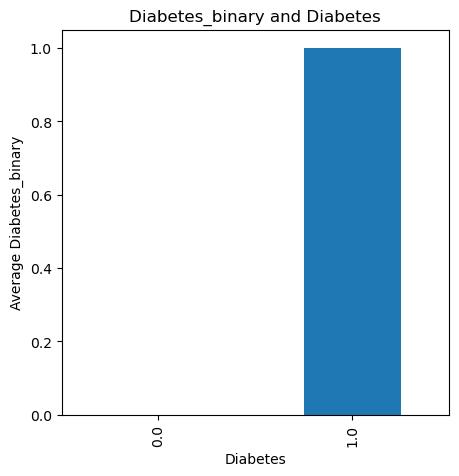

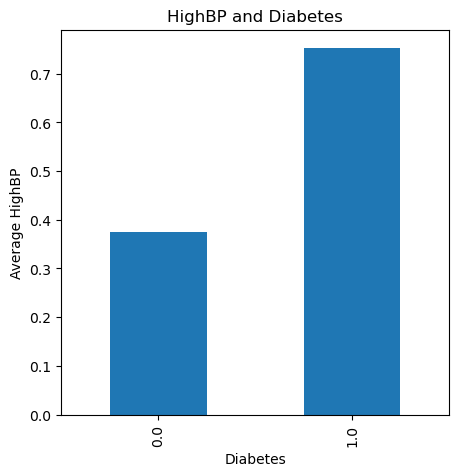

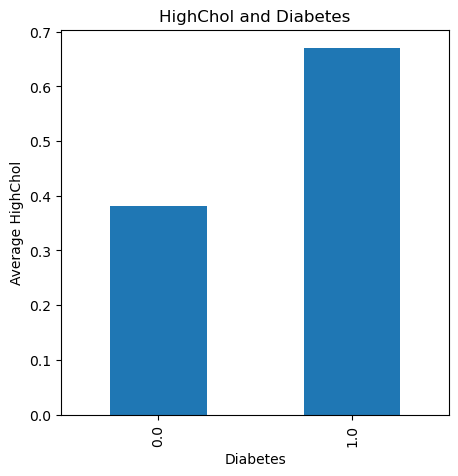

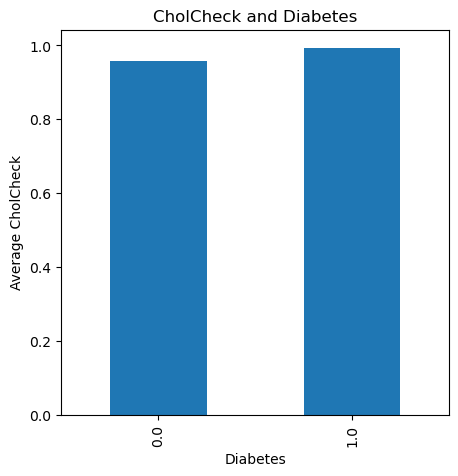

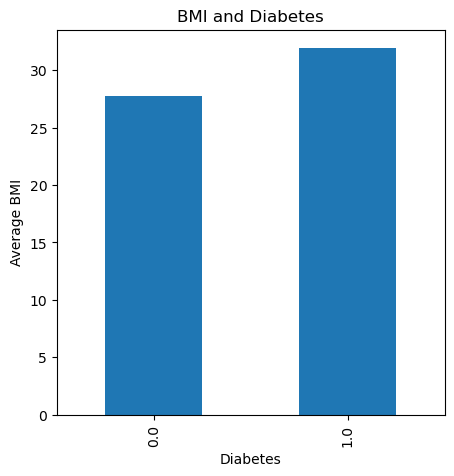

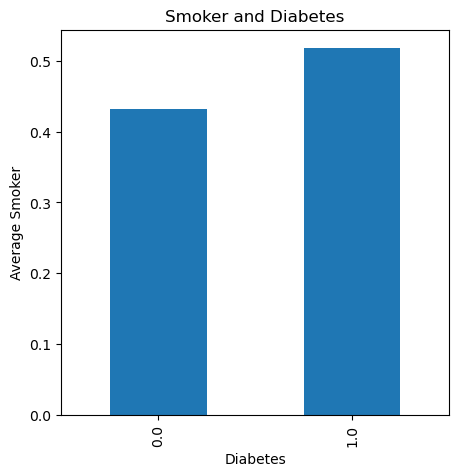

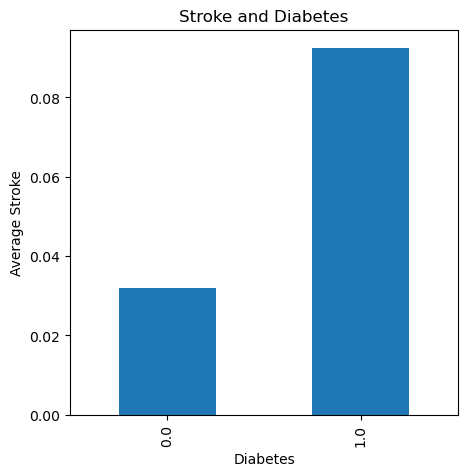

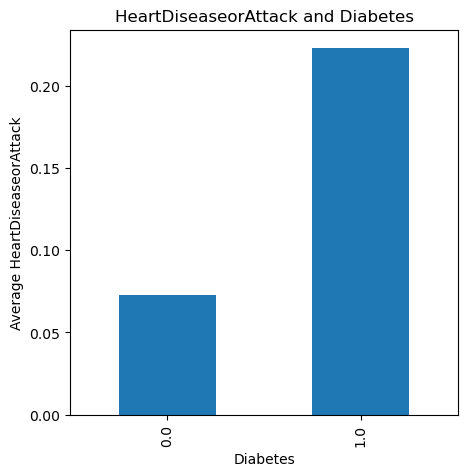

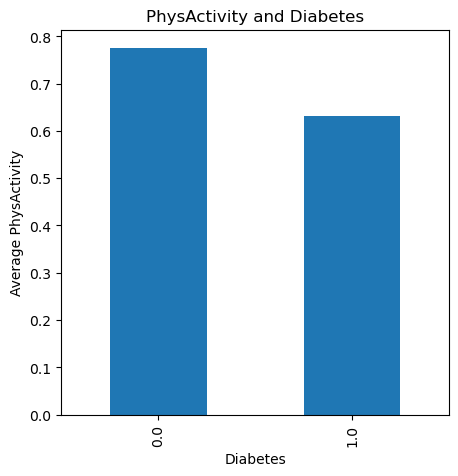

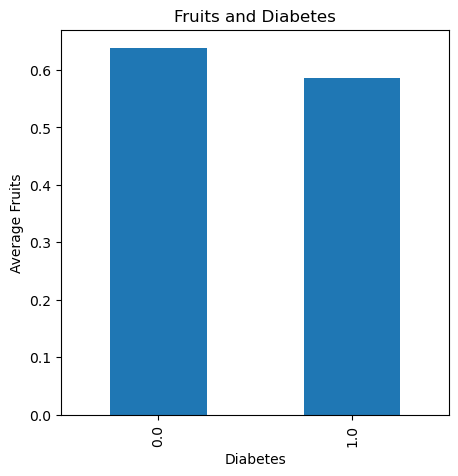

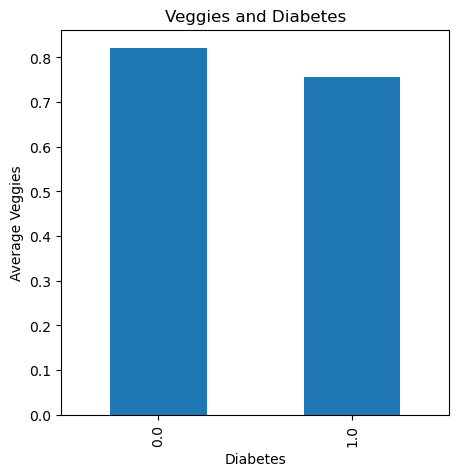

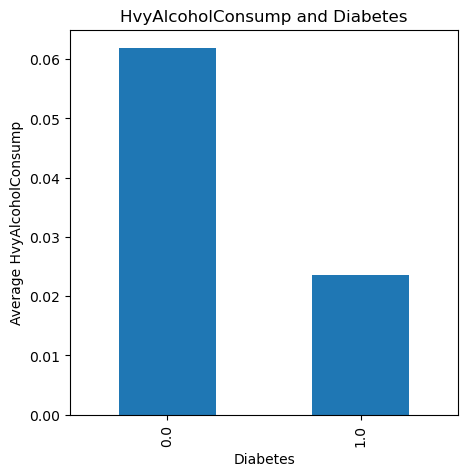

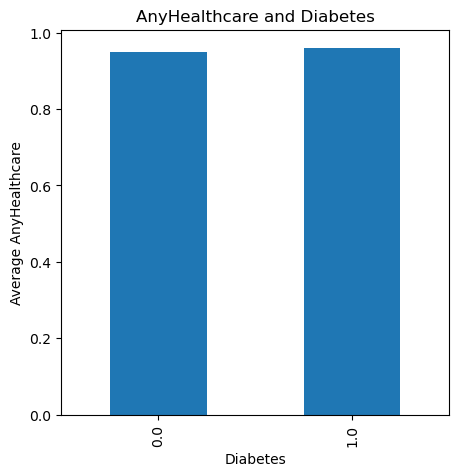

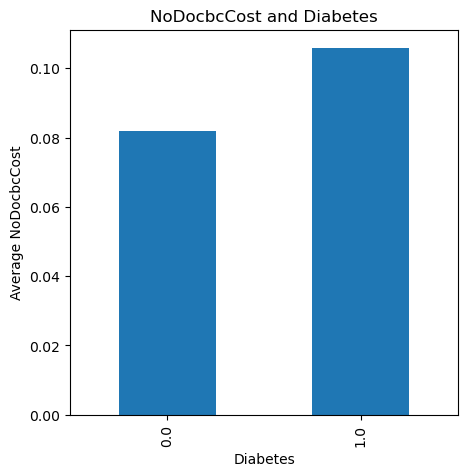

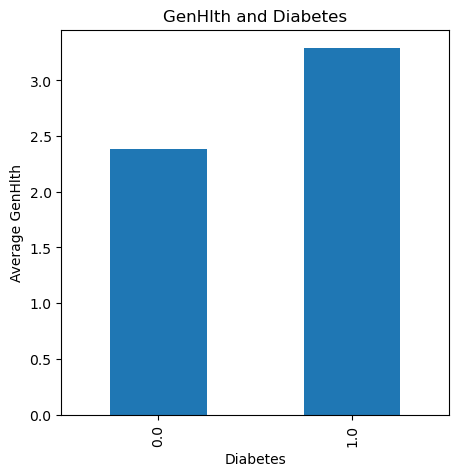

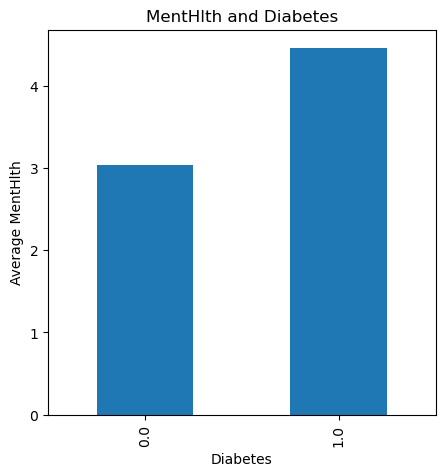

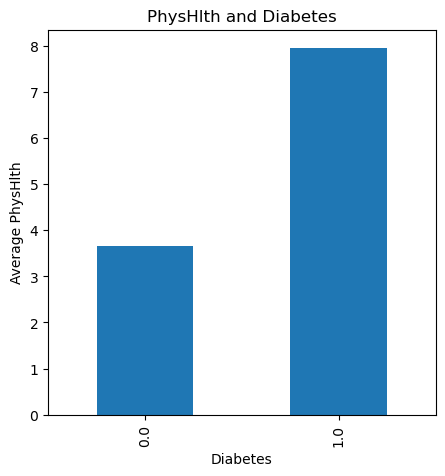

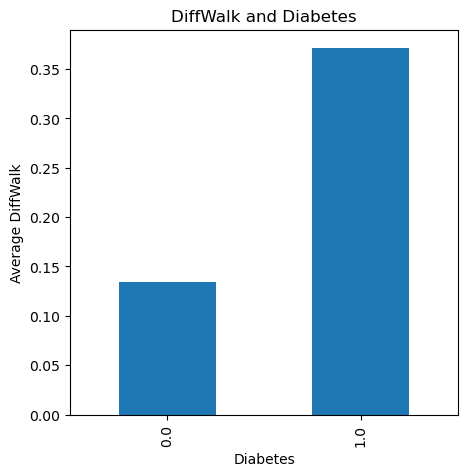

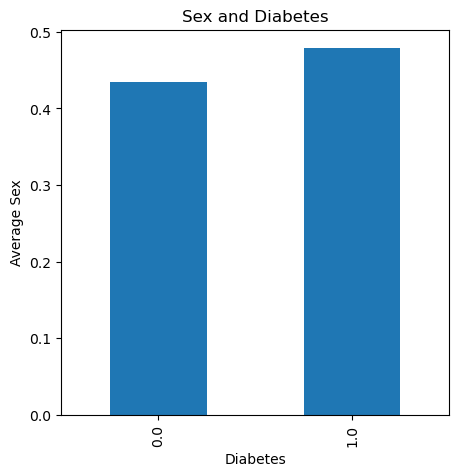

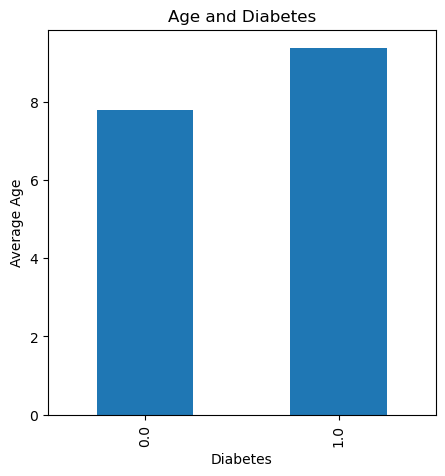

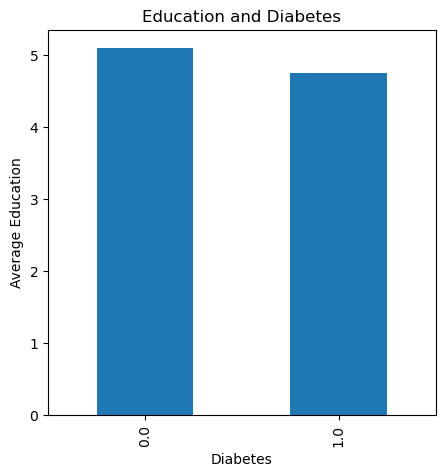

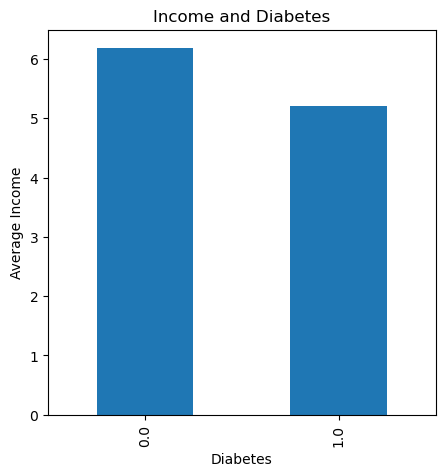

In [6]:
import matplotlib.pylab as plt
for column in df.columns:
    ax = df.groupby('Diabetes_binary')[column].mean() \
    .plot(kind='bar', figsize=(5,5), title=column + ' and Diabetes', 
          ylabel='Average ' + column, xlabel='Diabetes')
    plt.show()